# Pulsar Star Classification

This project is formed under 7 stages;
1. <a href='#data_reading_section'><b>Data Reading</b>
2. <a href='#data_cleaning_section'><b>Data Cleaning</b>
3. <a href='#data_exploring_section'><b>Data Exploring(EDA)</b>
    - 3.1. <a href='#3_1_section'><b>Univariate Measure Of Variability Analysis</b>
    - 3.2. <a href='#3_2_section'><b>Univariate Frequency Distribution Analysis</b>
    - 3.3. <a href='#3_3_section'><b>Bivariate (Numerical - Numerical) Feature Analysis</b>
    - 3.4. <a href='#3_4_section'><b>Bivariate (Numerical - Categorical) Feature Analysis</b>
    - 3.5. <a href='#3_5_section'><b>Multivariate Analysis</b>
4. <a href='#feature_engineering_section'><b>Feature Engineering</b>
5. <a href='#predictive_modelling_section'><b>Predictive Modelling</b>
6. <a href='#evaluating_models_section'><b>Evaluating Models</b>
7. <a href='#conclusion_section'><b>Conclusion</b>

<a id='data_reading_section'></a>
# 1. Data Read

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('/kaggle/input/pulsar-dataset-htru2/HTRU_2.csv', header=None)
raw_data.head(2)

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


<a id='data_cleaning_section'></a>
# 2. Data Cleaning

In [3]:
# Duplicated data detection
raw_data[raw_data.duplicated(keep=False)]

,0,1,2,3,4,5,6,7,8


In [4]:
# Data type check to understand if there is feature and data type inconsistency 
raw_data.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8      int64
dtype: object

In [5]:
# Missing value check
raw_data.isna().value_counts()

0      1      2      3      4      5      6      7      8    
False  False  False  False  False  False  False  False  False    17898
Name: count, dtype: int64

In [6]:
# Renaming column names
cleaned_data = raw_data.rename(columns={0:'i_p_mean', 1:'i_p_standard_deviation', 2:'i_p_kurtosis', 3:'i_p_skeweness', \
                                   4:'DM_SNR_mean', 5:'DM_SNR_standard_deviation', 6:'DM_SNR_kurtosis', 7:'DM_SNR_skeweness', \
                                   8:'PULSAR'})

Explanation of the column names:<br>
- **i_p_mean**: integrated profile mean
- **i_p_standard_deviation**: integrated profile standard deviation
- **i_p_kurtosis**: integrated profile excess kurtosis
- **i_p_skeweness**: integrated profile skeweness
- **DM_SNR_mean**: DM-SNR curve mean
- **DM_SNR_standard_deviation**: DM-SNR curve standard deviation
- **DM_SNR_kurtosis**: DM-SNR curve excess kurtosis
- **DM_SNR_skeweness**: DM-SNR curve skeweness
- **PULSAR**: Is the instance a Pulsar star? (1 for yes, and 0 for no)

In [7]:
cleaned_data.head(2)

,i_p_mean,i_p_standard_deviation,i_p_kurtosis,i_p_skeweness,DM_SNR_mean,DM_SNR_standard_deviation,DM_SNR_kurtosis,DM_SNR_skeweness,PULSAR
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


There is no missing value in the dataset and data types are consistent with their contents. Also, column names are changed with the proper feature names.\
!!! Name of the **raw_dataThere is no missing value in the dataset and data types are consistent with their contents. Also, column names are changed with the proper feature names.
!!! Name of the raw_data data frame is changed with the cleaned_data as end of stage indicator. data frame is changed with the **cleaned_data** as end of stage indicator.

<a id='data_exploring_section'></a>
# 3. Data Exploring(EDA)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr, skew, kurtosis

<a id='3_1_section'></a>
# 3.1. Univariate Measure Of Variability Analysis

Range of the i_p_mean attribute: [5, 192]

Inter Quartile Range(Q3-Q1) value for the i_p_mean attribute: 26

Skeweness of the i_p_mean attribute: -1.375072
Kurtosis of the i_p_mean attribute: 2.971208

Standard Deviation of the i_p_mean attribute: 25.652935
Variance of the i_p_mean attribute: 658.073093


[Text(0.5, 0, 'i_p_mean'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'i_p_mean-Density Distribution Plot')]

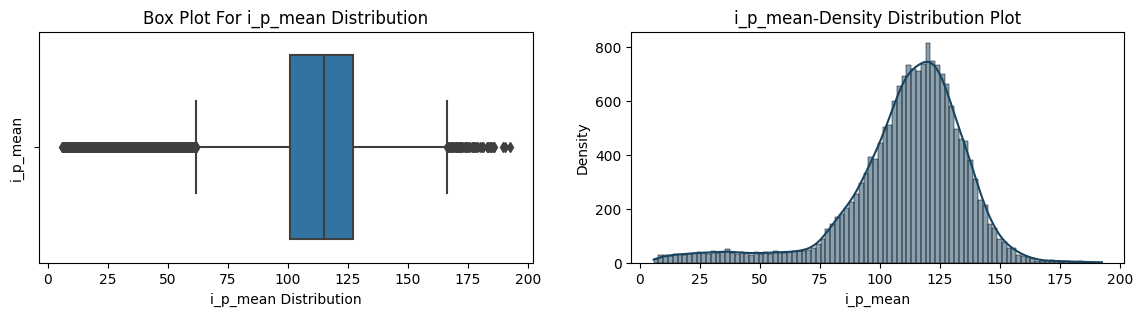

In [9]:
# Range of the i_p_mean attribute
i_p_mean_range = (cleaned_data['i_p_mean'].min(), cleaned_data['i_p_mean'].max())
print('Range of the i_p_mean attribute: [%d, %d]' % (i_p_mean_range[0], i_p_mean_range[1]))

# IQR value for the i_p_mean attribute
print('\nInter Quartile Range(Q3-Q1) value for the i_p_mean attribute: %d' % iqr(cleaned_data['i_p_mean']))

# Distribution properties of the i_p_mean attribute 
print('\nSkeweness of the i_p_mean attribute: %f' % skew(cleaned_data['i_p_mean']))
print('Kurtosis of the i_p_mean attribute: %f' % kurtosis(cleaned_data['i_p_mean']))

print('\nStandard Deviation of the i_p_mean attribute: %f' % cleaned_data['i_p_mean'].std())
print('Variance of the i_p_mean attribute: %f' % cleaned_data['i_p_mean'].var())


# Graphical Representation of i_p_mean feature
plt.figure(figsize=(14,3))

# Box PLot for the i_p_mean attribute
plt.subplot(1,2,1)
fig = sns.boxplot(x=cleaned_data['i_p_mean'])
fig.set(xlabel='i_p_mean Distribution', ylabel='i_p_mean', title='Box Plot For i_p_mean Distribution')

# Distribution plot for the i_p_mean attribute
plt.subplot(1,2,2)
fig = sns.histplot(cleaned_data['i_p_mean'], kde=True, color='#154360')
fig.set(xlabel='i_p_mean', ylabel='Density', title='i_p_mean-Density Distribution Plot')

According to above findings of the i_p_mean attribute, **i_p_mean** attribute **has Leptokurtic and extremely negative skewed Density-Distribution Graph** characteristic.

In order to avoid possibility of lost in tracking down the notebook, graphical plots of other columns are not represented.  However, their skeweness and kurtosis results are as follows; 
- i_p_mean attribute has a Leptokurtic and extremely negative skewed density distribution.
- i_p_standard_deviation and DM_SNR_kurtosis attributes have a Leptokurtic and extremely positive skewed density distribution.
- i_p_kurtosis, i_p_skeweness, DM_SNR_mean, DM_SNR_standard_deviation and DM_SNR_skeweness attributes have a slight Leptokurtic and extremely positive skewed density distribution.

<a id='3_2_section'></a>
# 3.2. Univariate Frequency Distribution Analysis

0 count in the dataset: 16259
1 count in the dataset: 1639


[Text(0.5, 0, 'PULSAR'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'PULSAR-Count Histogram Plot')]

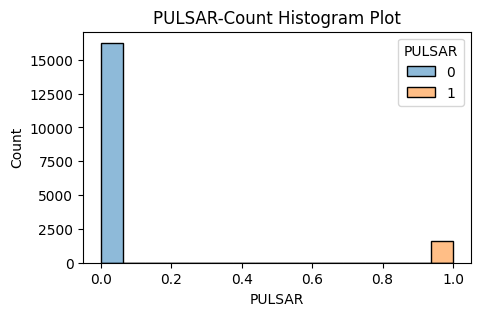

In [10]:
# PULSAR(1-0) counts in the dataset
print('0 count in the dataset: %d' % cleaned_data['PULSAR'].value_counts()[0])
print('1 count in the dataset: %d' % cleaned_data['PULSAR'].value_counts()[1])

# Histogram PLot for the PULSAR attribute
plt.figure(figsize=(5,3))
fig = sns.histplot(data=cleaned_data, x='PULSAR', hue='PULSAR')
fig.set(xlabel='PULSAR', ylabel='Count', title='PULSAR-Count Histogram Plot')

As it can be seen from the histogram plot, there is an **unbalanced dataset** for the target feature.

<a id='3_3_section'></a>
# 3.3. Bivariate (Numerical - Numerical) Feature Analysis

In [11]:
from scipy.stats import pearsonr

Text(0.5, 1.0, 'Correlations Of Features')

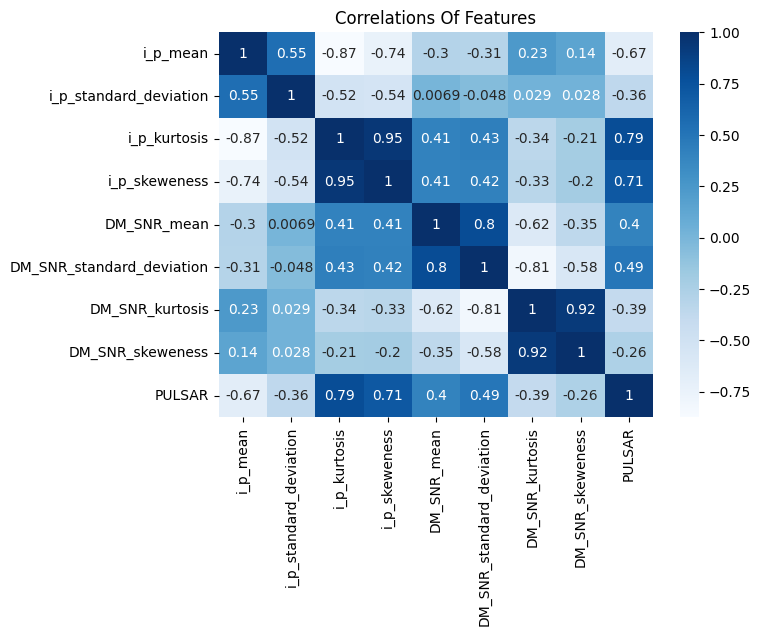

In [12]:
# Plotting Correlation Heatmap of the dataset 
correlation = cleaned_data.corr(numeric_only=True)
plt.figure(figsize=(7, 5))
sns.heatmap(data=correlation, annot=True, cmap='Blues')
plt.title('Correlations Of Features')

In [13]:
# All features correlation relationship
k = 0
l = 1
for i in cleaned_data.iloc[:,0:-1].columns:
    for j in cleaned_data.iloc[:,k:-1].columns:

        pearson_coeff = pearsonr(cleaned_data[i], cleaned_data[j])[0]
        p_value = pearsonr(cleaned_data[i], cleaned_data[j])[1]
        
        if p_value < 0.05 and (pearson_coeff > 0.5 or pearson_coeff < -0.5) and (i != j):
            print('\nLine/Pair ', l)
            print('Pearson Correlation Coefficient(r) Between %s and %s : %f' % (i, j, pearson_coeff))
            print('p-value Between %s and %s  : ' % (i, j), p_value)
            l+=1
    k += 1


Line/Pair  1
Pearson Correlation Coefficient(r) Between i_p_mean and i_p_standard_deviation : 0.547137
p-value Between i_p_mean and i_p_standard_deviation  :  0.0

Line/Pair  2
Pearson Correlation Coefficient(r) Between i_p_mean and i_p_kurtosis : -0.873898
p-value Between i_p_mean and i_p_kurtosis  :  0.0

Line/Pair  3
Pearson Correlation Coefficient(r) Between i_p_mean and i_p_skeweness : -0.738775
p-value Between i_p_mean and i_p_skeweness  :  0.0

Line/Pair  4
Pearson Correlation Coefficient(r) Between i_p_standard_deviation and i_p_kurtosis : -0.521435
p-value Between i_p_standard_deviation and i_p_kurtosis  :  0.0

Line/Pair  5
Pearson Correlation Coefficient(r) Between i_p_standard_deviation and i_p_skeweness : -0.539793
p-value Between i_p_standard_deviation and i_p_skeweness  :  0.0

Line/Pair  6
Pearson Correlation Coefficient(r) Between i_p_kurtosis and i_p_skeweness : 0.945729
p-value Between i_p_kurtosis and i_p_skeweness  :  0.0

Line/Pair  7
Pearson Correlation Coeffici

There are some statistically strong correlations between some pairs. They might effect Machine Learning model that is going to be used.

<a id='3_4_section'></a>
# 3.4. Bivariate (Numerical - Categorical) Feature Analysis

[Text(0.5, 0, 'PULSAR'),
 Text(0, 0.5, 'i_p_mean'),
 Text(0.5, 1.0, 'i_p_mean-PULSAR Correlation')]

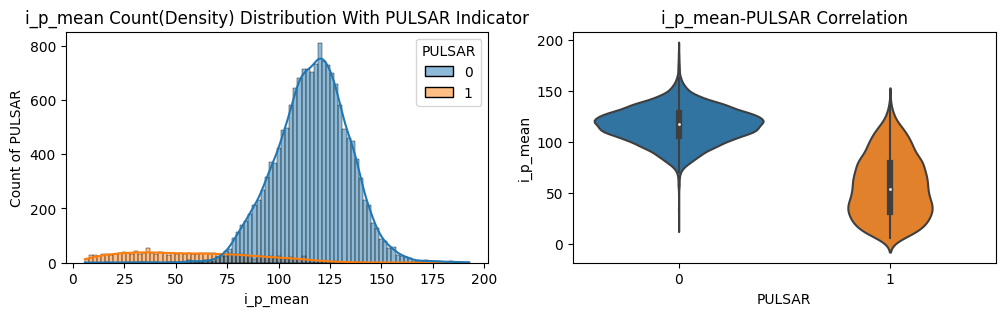

In [14]:
# Features - Target Analysis

# Distribution plot for i_p_mean density by emphasizing PULSAR 
plt.figure(figsize=(12, 3))

plt.subplot(1,2,1)
fig = sns.histplot(cleaned_data, x='i_p_mean', hue='PULSAR', kde=True)
fig.set(xlabel='i_p_mean', ylabel='Count of PULSAR', title='i_p_mean Count(Density) Distribution With PULSAR Indicator')

plt.subplot(1,2,2)
fig = sns.violinplot(cleaned_data, x='PULSAR', y='i_p_mean')
fig.set(xlabel='PULSAR', ylabel='i_p_mean', title='i_p_mean-PULSAR Correlation')

In order to avoid possibility of lost in tracking down the notebook, other columns are not represented.  However, their results are as follows; 
1. **ip_mean Result**: PULSARs are accumulated between approximately around 0 to 70 mean integrated profile. Thus, i_p_mean feature must be a decisive indicator for the classification model.
2. **i_p_standard_deviation Result**: PULSARs are accumulated between approximately around 0 to 40 integrated profile standard deviation. Thus, i_p_standard_deviation feature should be a decisive indicator for the classification model.
3. **i_p_kurtosis Result**: NOT PULSARs are accumulated between approximately around -2 to 2 integrated profile kurtosis. Thus, i_p_kurtosis feature should be decisive indicator for the classification model.
4. **i_p_skeweness Result**: NOT PULSARs are accumulated between approximately around -5 to 5 integrated profile skewness. Thus, i_p_skeweness feature should be a decisive indicator for the classification model. Also, there is a significant amount of PULSAR in that range.
5. **DM_SNR_mean Result**: NOT PULSARs are accumulated between approximately around 0 to 20 mean of the DM-SNR curve. Also, there is a significant amount of PULSAR in that range. Thus, DM_SNR_mean feature should be considered to use in classification model.
6. **DM_SNR_standard_deviation Result**: PULSARs are accumulated between approximately around 55 to 75 DM-SNR curve standard deviation. Thus, DM_SNR_standard_deviation feature should be a decisive indicator for the classification model.
7. **DM_SNR_kurtosis Result**: PULSARs are accumulated between approximately 0 to 5 DM-SNR curve kurtosis. Thus, DM_SNR_kurtosis feature should be a decisive indicator for the classification model.
8. **DM_SNR_skeweness Result**: There are decreasing accumulation between 0 to 200 for the PULSARs and also there are increasing accumulation for the NOT PULSARs. Therefore, DM_SNR_skeweness feature can be considered if it should be used or not used in the model.

!!! Note: According to above graphical findings, i_p_mean, i_p_kurtosis, i_p_skeweness features can contribute to the model more than i_p_standard_deviation, DM_SNR_standard_deviation, DM_SNR_kurtosis, DM_SNR_skeweness, DM_SNR_mean features. Also, features are written consecutively with respect to assumed significance order.

<a id='3_5_section'></a>
# 3.5. Multivariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


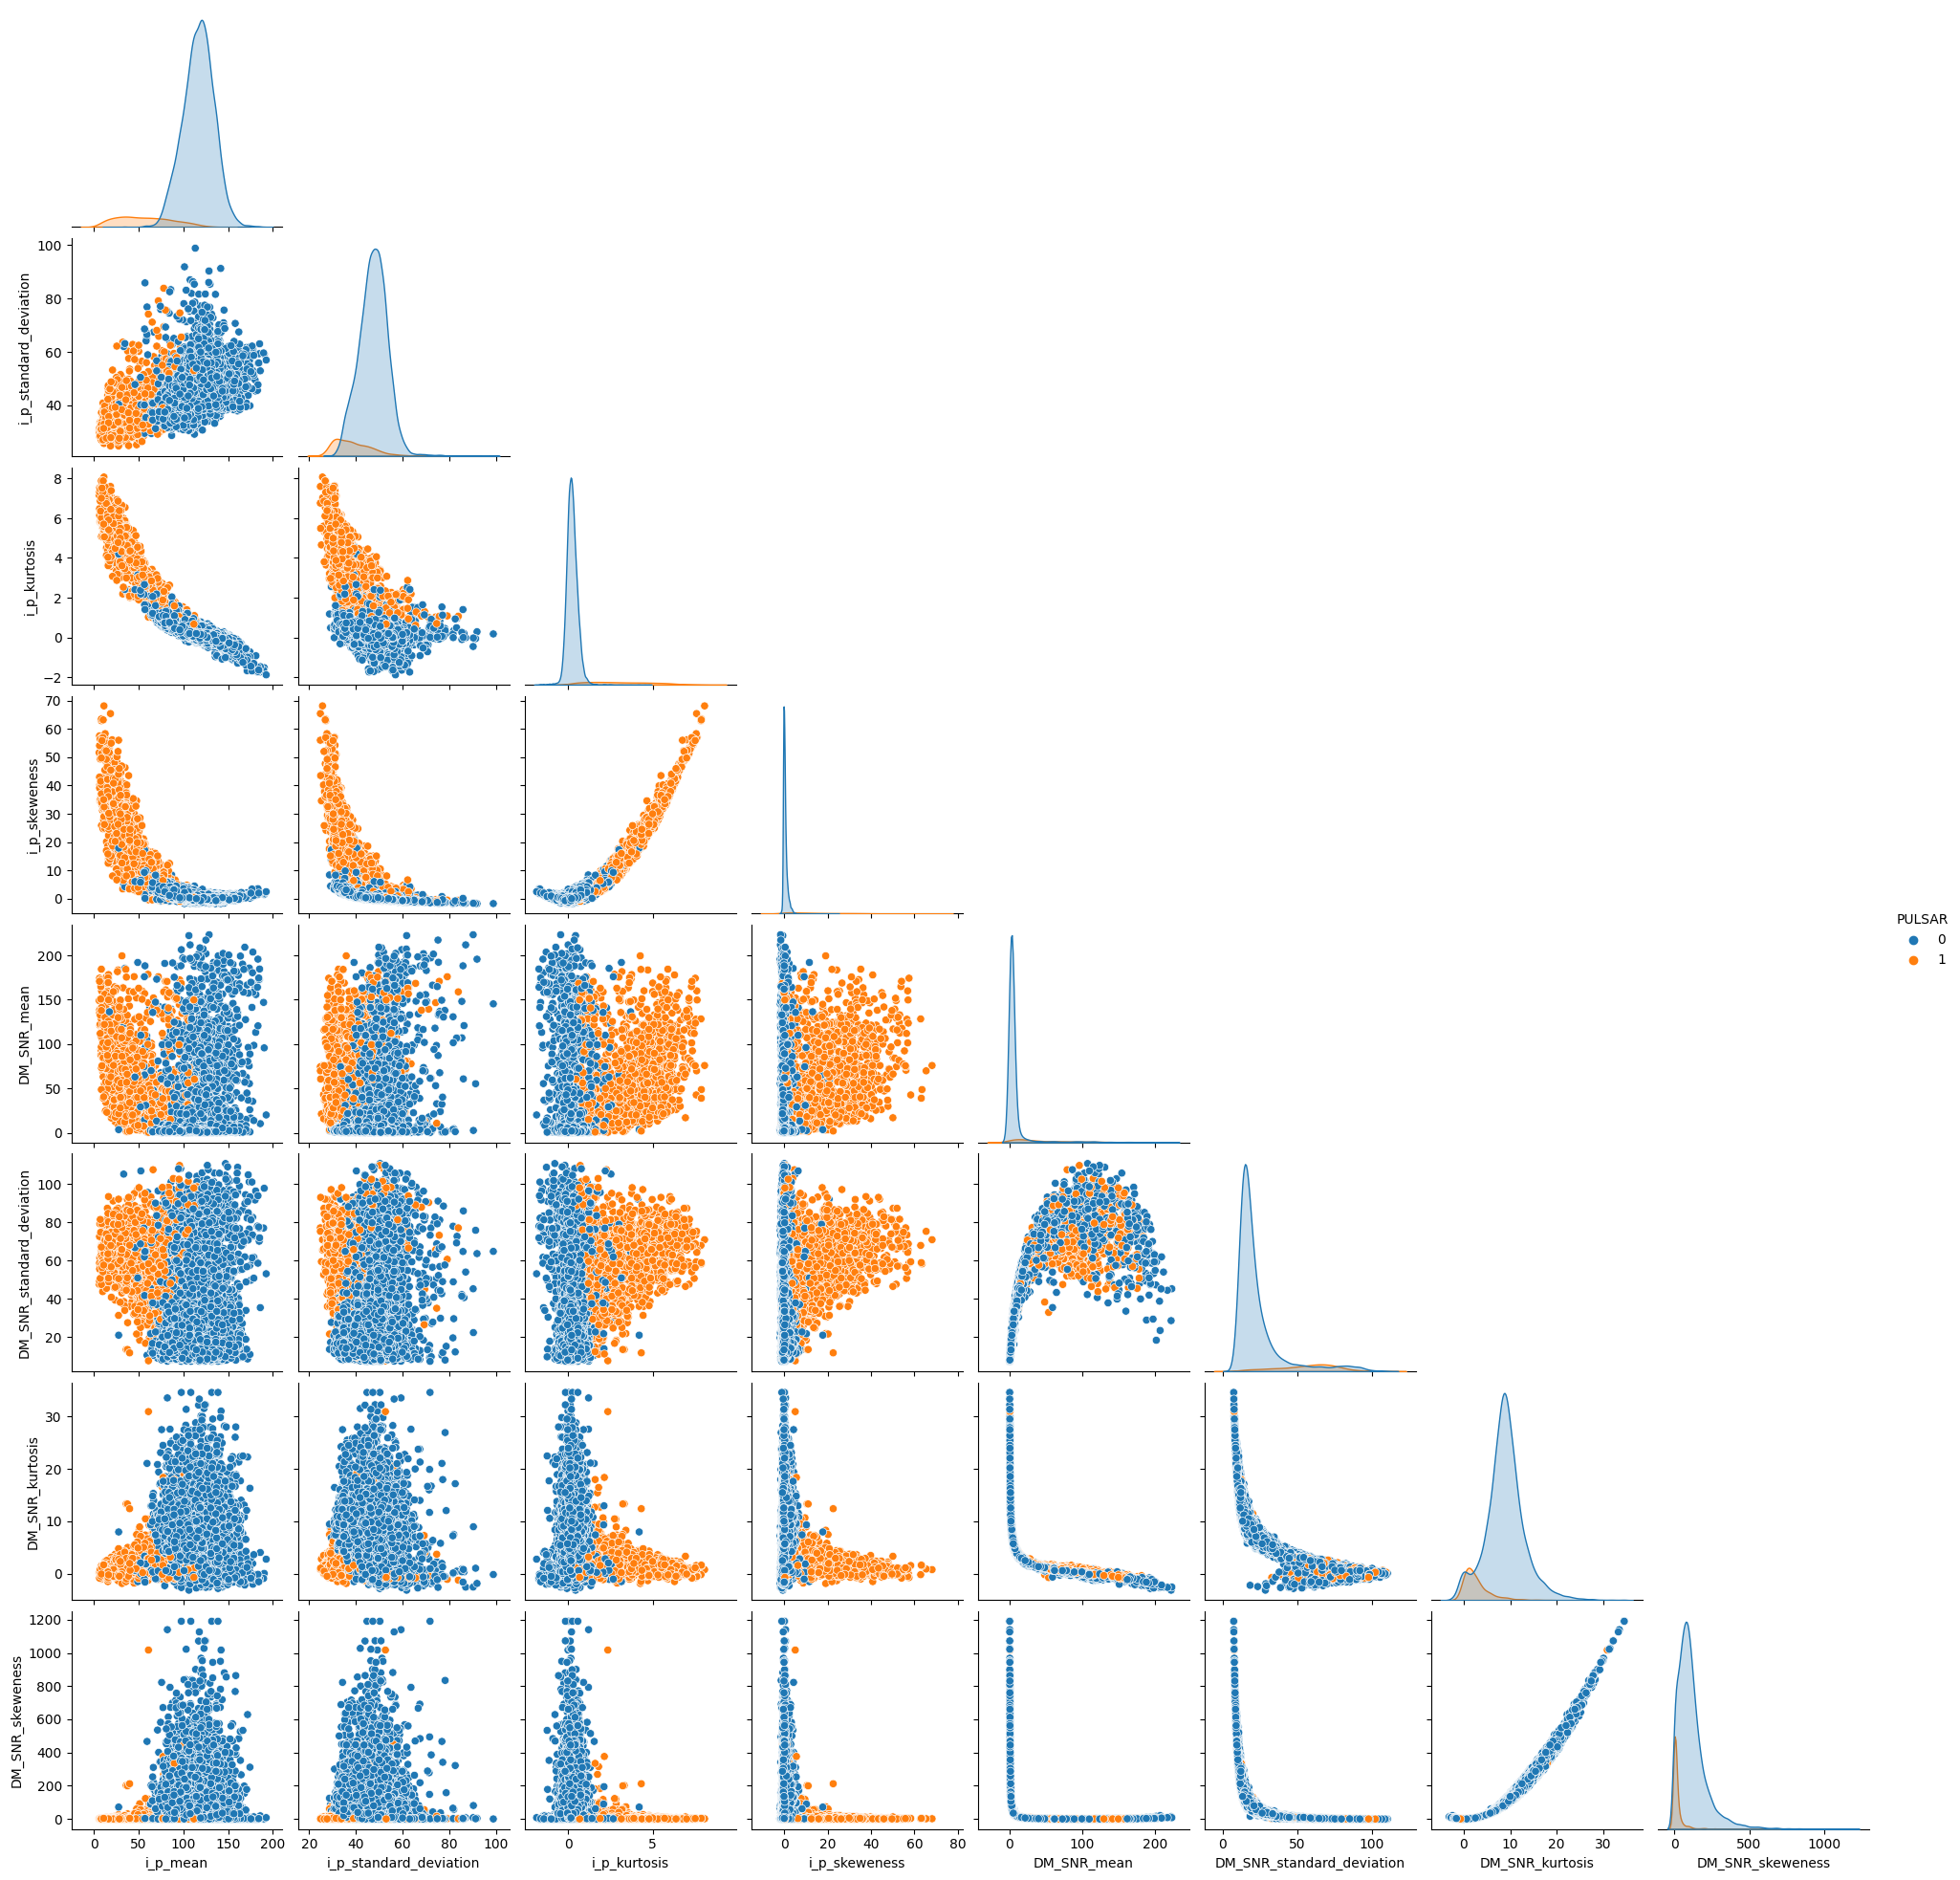

In [15]:
# Pair plots of the numerical columns with PULSAR indicator
sns.pairplot(cleaned_data, hue='PULSAR', corner=True)

It seems PULSAR data is not homogeneously scattered in almost every combination. Thus, it can be said that there is a pattern in the graphs. So, it can be assumed that if the model can catch these patterns, then the model can have a good accuracy.

<a id='feature_engineering_section'></a>
# 4. Feature Engineering

In this section, unnecessary features are eliminated, encoding required features are encoded and scaling operations are runned. However, there are no eliminated and encoding  features in this project. Also, the scope of this project is classification algorithms  which theoretically require no scaling. Thus, there is no applied scaling algorithm. It should be mentioned that scaling might increase working time of the classification algorithms.

In [16]:
# !!! Name of the cleaned_data data frame is changed with the transformed_data as end of stage indicator.
transformed_data = cleaned_data

<a id='predictive_modelling_section'></a>
# 5. Predictive Modelling

There is 9 applied popular classification algorithms for this project as it is shown in the following list;
- Logistic Regression
- Decision Tree
- Support Vector Machines(SVM)
- Naive Bayes
- K-Nearest Neighbors(KNN)
- Random Forest
- AdaBoost
- GradientBoosting
- eXtremeGradientBoosting

!!! It should be mentioned that, grid search approach is applied in order to get higher scores.

In [17]:
###  Dataset Splitting
from sklearn.model_selection import train_test_split

# Predictors
X = transformed_data[['i_p_mean', 'i_p_standard_deviation', 'i_p_kurtosis', 'i_p_skeweness', \
                      'DM_SNR_mean', 'DM_SNR_standard_deviation', 'DM_SNR_kurtosis', 'DM_SNR_skeweness']]
# Target
Y = transformed_data['PULSAR']

# Splitting dataset into train and test datasets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='liblinear')
logr.fit(train_x, train_y)

logr_test_y_hat = logr.predict(test_x)

In [19]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)

decision_tree_test_y_hat = decision_tree.predict(test_x)

In [20]:
# Support Vector Machines(SVM)
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(train_x, train_y)

svm_test_y_hat = svm.predict(test_x)

In [21]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()
gaussian_nb.fit(train_x, train_y)

gaussian_nb_test_y_hat = gaussian_nb.predict(test_x)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# K-Nearest Neighbors(KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

parameters = [{'n_neighbors':[3, 5, 7, 9, 11], 
               'weights' : ['uniform', 'distance'],
               'leaf_size':[20, 30, 40]}]

knn_grid = GridSearchCV(estimator=knn,
                         param_grid = parameters,
                         scoring='f1')

knn_grid.fit(train_x, train_y)

knn_test_y_hat = knn_grid.predict(test_x)

In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(train_x, train_y)

random_forest_test_y_hat = random_forest.predict(test_x)

In [25]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()
parameters = [{'n_estimators':[25, 50, 100], 'learning_rate' : [0.5, 1, 2]}]
ada_boost_grid = GridSearchCV(estimator=ada_boost, 
                              param_grid = parameters, 
                              scoring='f1')
ada_boost_grid.fit(train_x, train_y)

ada_boost_test_y_hat = ada_boost_grid.predict(test_x)

In [26]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05)
gradient_boosting.fit(train_x, train_y)

gradient_boosting_test_y_hat = gradient_boosting.predict(test_x)

In [27]:
# eXtremeGradientBoosting
from xgboost import XGBClassifier

xg_boost = XGBClassifier()
parameters = [{'eta' : [0.05, 0.15, 0.3, 0.6]}]
xg_boost_grid = GridSearchCV(estimator=xg_boost,
                             param_grid = parameters, 
                             scoring='f1')
xg_boost_grid.fit(train_x, train_y)

xg_boost_test_y_hat = xg_boost_grid.predict(test_x)

<a id='evaluating_models_section'></a>
# 6. Evaluating Models

It should be mentioned that this dataset has an **unbalanced** target structure. Because, there are 16259 NOT Pulsar records although there are 1639 Pulsar records. Also, the same situation is valid for the test_y dataset. Since, there are 3259 Not Pulsar records although there are 321 Pulsar records. Therefore, **accuracy shouldn't be used** as an evaluation metric. Because, all the correctly predicted results are considered in Accuracy Score. However, the amount of the prediction of the majority class(which is 0 here) will be more than the minority class(which is searched for in this project). Hence, if accuracy is used as an evaluation metric, then the model will look more successful than it already is.

In [28]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#### Unbalanced Dataset

In [29]:
# Unbalanced dataset for target aspect
px.pie(pd.DataFrame(data=transformed_data['PULSAR'].value_counts()).reset_index(), \
       values='count', \
       names='PULSAR', \
       hole=.2, \
       title='PULSAR Star Distribution ')

#### Predictions of The Models

In [30]:
# Creating a data frame that holds all predicted results
model_predictions = pd.DataFrame(data={'Logistic Regression':logr_test_y_hat, \
                                       'Decision Tree':decision_tree_test_y_hat, \
                                       'Support Vector Machines(SVM)':svm_test_y_hat, \
                                       'Naive Bayes':gaussian_nb_test_y_hat, \
                                       'K-Nearest Neighbors(KNN)':knn_test_y_hat, \
                                       'Random Forest':random_forest_test_y_hat, \
                                       'AdaBoost':ada_boost_test_y_hat, 
                                       'GradientBoosting':gradient_boosting_test_y_hat, \
                                       'eXtremeGradientBoosting':xg_boost_test_y_hat})

#### Confusion Matrix

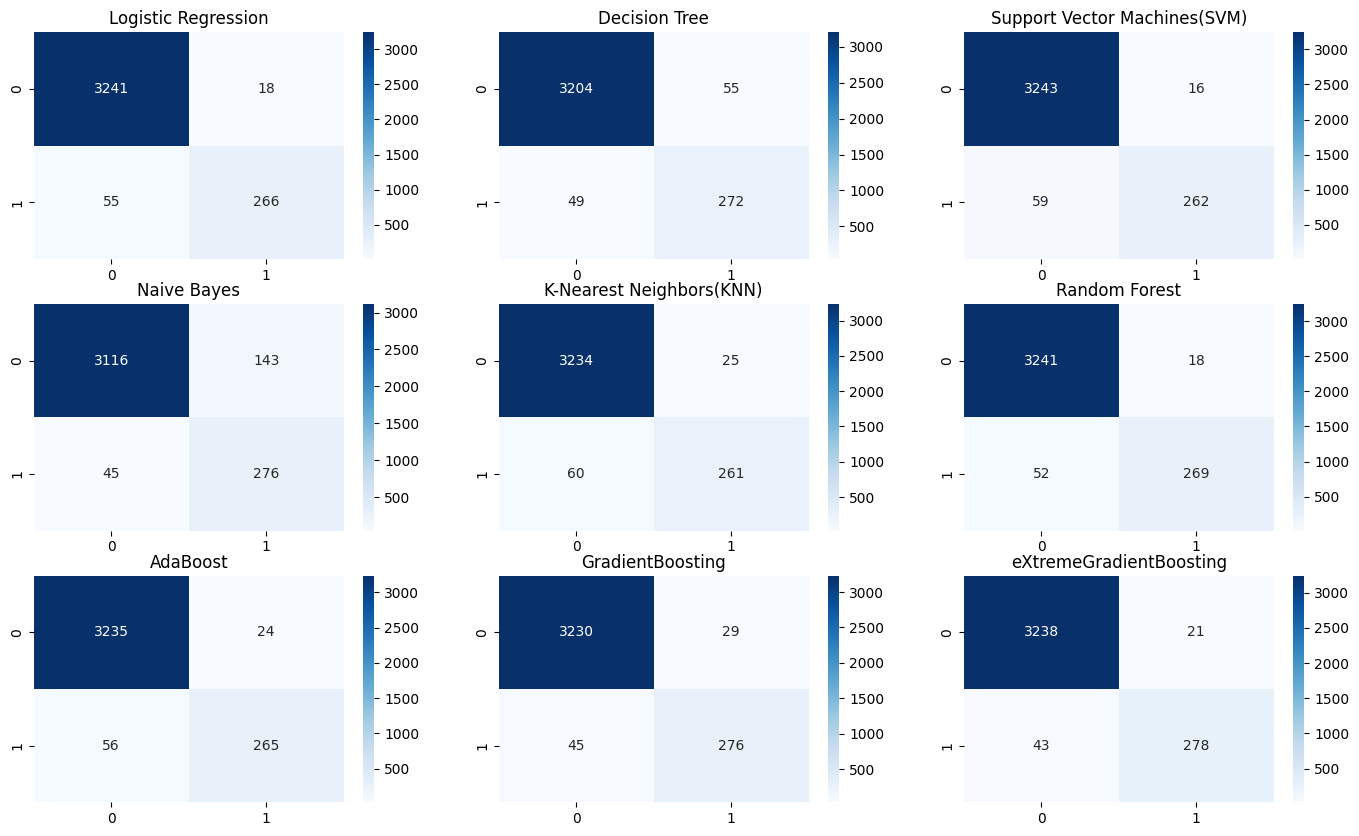

In [31]:
# Confusion matrix of all models
plt.figure(figsize=(17,10))
for i in range(0,len(model_predictions.columns)):
    plt.subplot(3, 3,i+1)
    fig = sns.heatmap(confusion_matrix(test_y, model_predictions.iloc[:,i]), annot=True, fmt='d', cmap='Blues')
    fig.set(title = model_predictions.columns[i])

#### F1 Scores


The Best F1 Score: [['eXtremeGradientBoosting']] with 0.896774 value.



[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Support Vector Machines(SVM)'),
 Text(3, 0, 'Naive Bayes'),
 Text(4, 0, 'K-Nearest Neighbors(KNN)'),
 Text(5, 0, 'Random Forest'),
 Text(6, 0, 'AdaBoost'),
 Text(7, 0, 'GradientBoosting'),
 Text(8, 0, 'eXtremeGradientBoosting')]

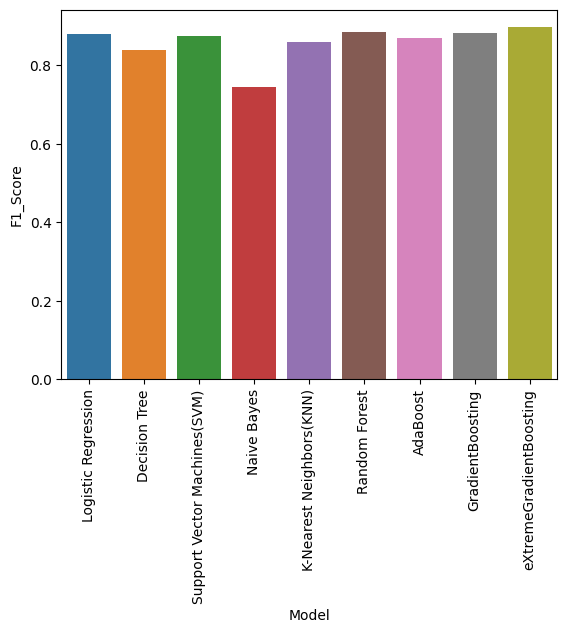

In [32]:
# F1-Scores of all models
model_f1_scores = pd.DataFrame()
for i in range(0, len(model_predictions.columns)):
    model_f1_scores.loc[i, 'Model'] = model_predictions.columns[i]
    model_f1_scores.loc[i, 'F1_Score'] = f1_score(test_y, model_predictions[model_predictions.columns[i]])

best_fit_model = model_f1_scores[model_f1_scores['F1_Score'] == model_f1_scores['F1_Score'].max()][['Model']].to_numpy()
best_fit_model_f1_score = model_f1_scores['F1_Score'].max()

print('\nThe Best F1 Score: %s with %f value.\n' % (best_fit_model, best_fit_model_f1_score))
fig = sns.barplot(model_f1_scores, x='Model', y='F1_Score')
fig.set_xticklabels(model_f1_scores['Model'], rotation=90)

In [33]:
model_f1_scores

,Model,F1_Score
0,Logistic Regression,0.879339
1,Decision Tree,0.839506
2,Support Vector Machines(SVM),0.874791
3,Naive Bayes,0.745946
4,K-Nearest Neighbors(KNN),0.859967
5,Random Forest,0.884868
6,AdaBoost,0.868852
7,GradientBoosting,0.881789
8,eXtremeGradientBoosting,0.896774


#### ROC Curve And AUC

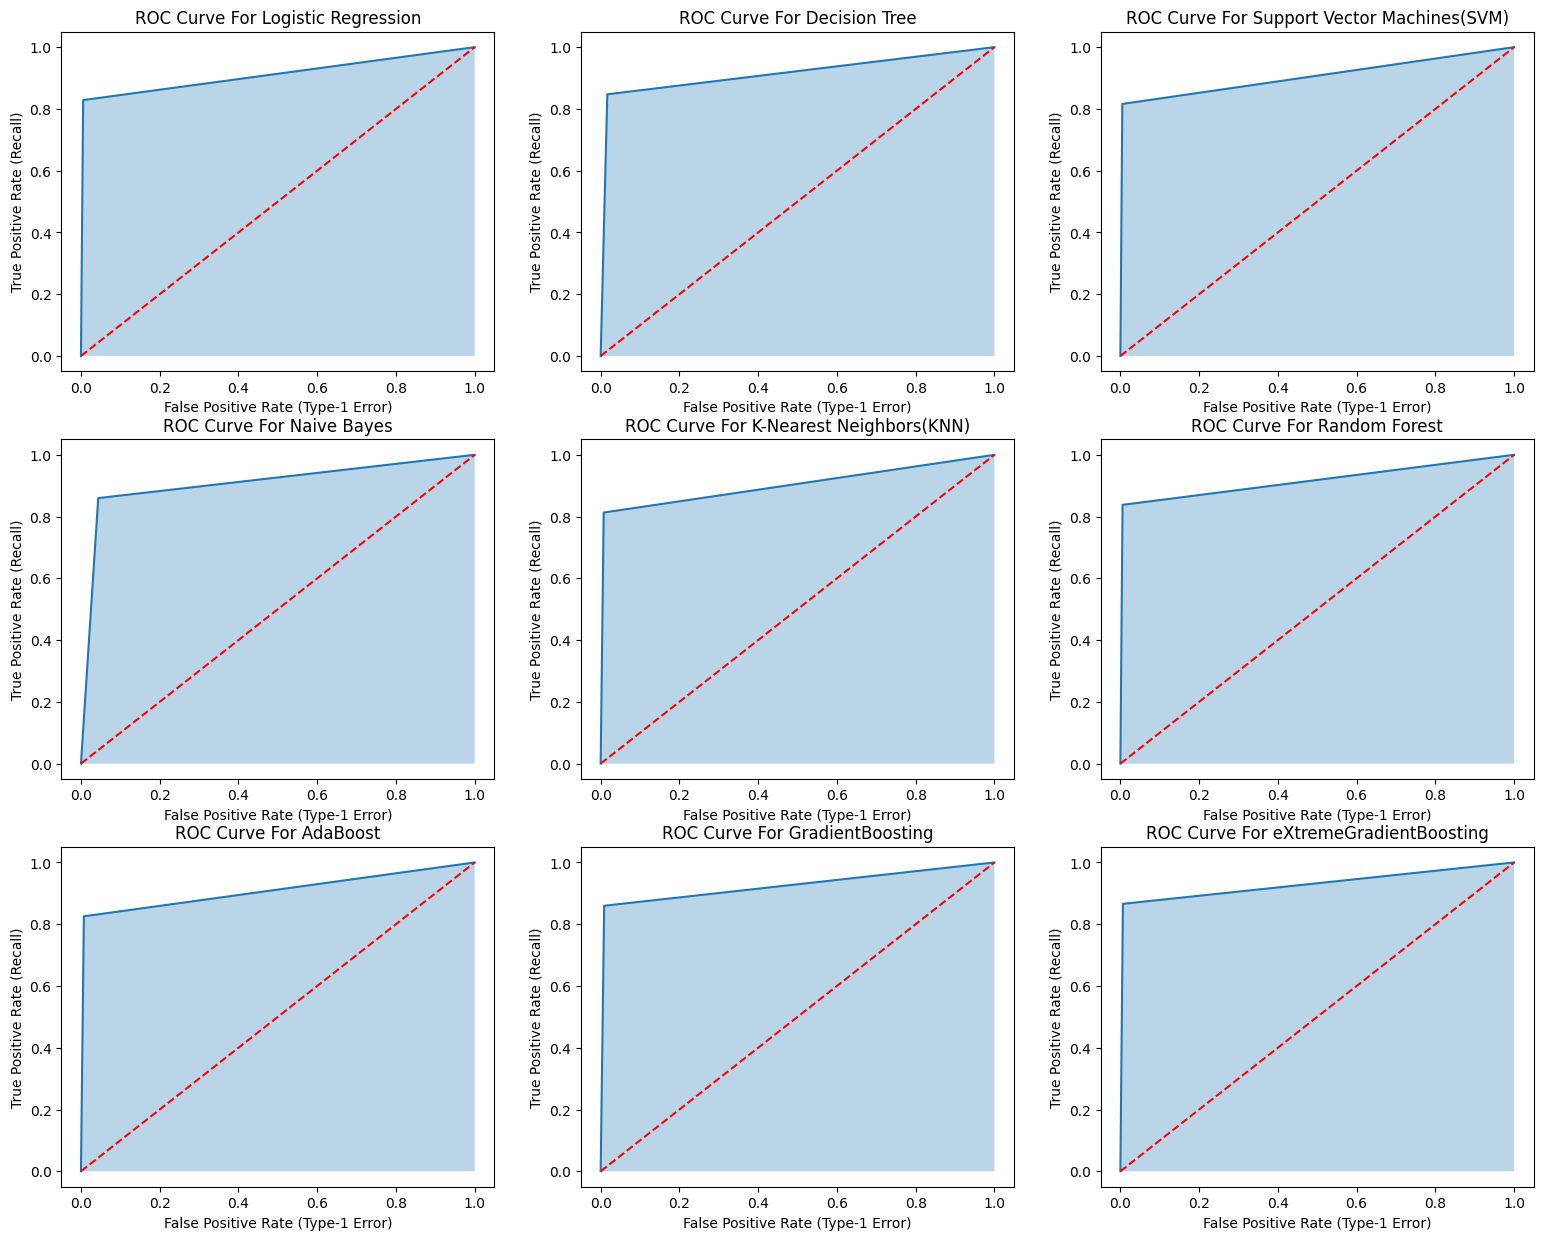

In [34]:
# Obtaining ROC Curves for all applied models
plt.figure(figsize=(19,15))
for i in range(0, len(model_predictions.columns)):
    fpr, tpr, threshold = roc_curve(test_y, model_predictions.iloc[:,i])
    plt.subplot(3, 3, i+1)
    plt.plot(fpr, tpr)
    plt.fill_between(fpr, tpr, alpha=0.3)
    plt.plot([0,1], [0,1], 'r--' )
    plt.title('ROC Curve For '+ model_predictions.columns[i])
    plt.xlabel('False Positive Rate (Type-1 Error)')
    plt.ylabel('True Positive Rate (Recall)')

In [35]:
# Obtaining AUC Scores for all applied models
AUC_scores = pd.DataFrame()
for i in range(0, len(model_predictions.columns)):
    AUC_scores.loc[i,'Model'] = model_predictions.columns[i]
    AUC_scores.loc[i,'AUC_Score'] = roc_auc_score(test_y, model_predictions.iloc[:,i]) 


The Best AUC Score: [['eXtremeGradientBoosting']] with 0.929800 value.



[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Support Vector Machines(SVM)'),
 Text(3, 0, 'Naive Bayes'),
 Text(4, 0, 'K-Nearest Neighbors(KNN)'),
 Text(5, 0, 'Random Forest'),
 Text(6, 0, 'AdaBoost'),
 Text(7, 0, 'GradientBoosting'),
 Text(8, 0, 'eXtremeGradientBoosting')]

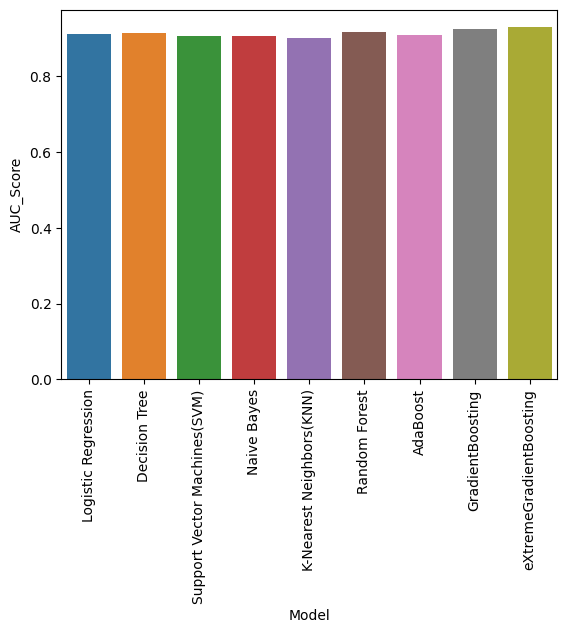

In [36]:
best_auc_score_model = AUC_scores[AUC_scores['AUC_Score'] == AUC_scores['AUC_Score'].max()][['Model']].to_numpy()
best_auc_score = AUC_scores['AUC_Score'].max()

print('\nThe Best AUC Score: %s with %f value.\n' % (best_auc_score_model, best_auc_score))
fig = sns.barplot(AUC_scores, x='Model', y='AUC_Score')
fig.set_xticklabels(AUC_scores['Model'], rotation=90)

According to evaluation results, the best performing model is the **eXtremeGradientBoosting** with **0.896774 F1 score**. Also, it has the **widest AUC** among all applied models **with 0.929800** value.

<a id='conclusion_section'></a>
# 7. Conclusion

There is a clean dataset that has no missing values or any other inconsistencies. Also, this project is a classification project. So,there were no applied scaling methods to improve model performance. At the third step, some data exploration techniques have been applied to get some insights. According to the results, there are some features that might be more useful than other features as it is stated in the section ending. According to this result, models can be used with the proper weights. Weighted model prediction hasn't been used in this notebook but it is recommended.  At the fifth stage, nine classification models have been used to obtain different predicted results. Also, GridSearchCV technique has been used on some models to increase their performances. In the evaluating stage, models have been evaluated with F1 Score evaluation and AUC metrics but Accuracy Score hasn't been used. The reason behind that, used dataset is an Un-Balanced dataset and Accuracy Score isn't robust to the unbalanced datasets. On the contrary, F1 score evaluates the model by using equal weights on the Precision and Recall. Therefore, F1 Score has a more realistic approach to the evaluation. As a conclusion of this project, the best performing model among all nine models is the eXtremeGradientBoosting model with 0.896774 F1 score and 0.929800 AUC value.

---

The Dataset that is used in this project is shared by Robert Lyon on the UC Irvine Machine Learning Repository.

Citation: Lyon,Robert. (2017). HTRU2. UCI Machine Learning Repository. https://doi.org/10.24432/C5DK6R.